## Introduction
In today’s data-driven world, understanding consumer behavior and sales trends is essential for businesses, especially during festive seasons like Diwali. This analysis focuses on the Diwali Sales Data, which contains valuable insights into purchasing patterns across various demographics.

The primary goal of this `exploratory data analysis (EDA)` is to uncover trends and relationships within the dataset that can inform marketing strategies and product offerings. By examining factors such as gender, age group, marital status, occupation, and product categories, we aim to identify key insights that can enhance business performance during the festive season.

## Objectives:
Data Cleaning and Preparation: Ensuring the dataset is clean and ready for analysis by handling missing values and transforming data types.
Descriptive Analysis: Summarizing the data to understand distributions and central tendencies across key variables.
Visualization: Using plots to visually represent relationships and trends, making the insights more accessible and understandable.
Insights Extraction: Drawing actionable insights based on the analysis to aid in decision-making for businesses.
This EDA provides a comprehensive overview of sales dynamics during Diwali, revealing how different demographic factors influence purchasing decisions. The findings will offer valuable recommendations for businesses aiming to optimize their sales strategies during this critical period.

Author: Sher Taj

Email:shertajkhan002@gmail.com

## 1. Importing Libraries
   
- Pandas: Used for data manipulation and analysis. It provides data structures like DataFrames.
- NumPy: A library for numerical operations, often used alongside Pandas.
- Matplotlib: A plotting library for creating static, animated, and interactive visualizations.
- Seaborn: Built on Matplotlib, it provides a high-level interface for drawing attractive statistical graphics.
- %matplotlib inline: This magic command allows plots to be displayed inline in Jupyter Notebooks.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

##  2. `Loading the Dataset`
> Loads the dataset from a CSV file into a Pandas DataFrame.<br>
>  The encoding='unicode_escape' handles special characters in the data.

In [2]:
df = pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape')

## 3. `Exploring the Data`

- df.shape: Returns the number of rows and columns in the DataFrame.

In [3]:
df.shape

(11251, 15)

- df.head(): Displays the first five rows of the dataset, giving a quick overview of the data.

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


- df.columns: Lists the column names in the DataFrame.
  

In [5]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

- df.info(): Provides a concise summary of the DataFrame, including the data types of each column and the count of non-null values.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


## 4. Data Cleaning

`Drops unnecessary columns ('Status' and 'unnamed1') from the DataFrame. axis=1 specifies that columns are being dropped, and inplace=True modifies the original DataFrame`

In [7]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

## 5. Handling Missing Values

> Removes any rows with missing values from the DataFrame.


In [8]:
# drop null values
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


`Checks for any remaining missing values in each column.`

In [10]:
# pd.isnull(df).sum() you can also check by this method
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

## 6. Data Type Conversion

`Converts the 'Amount' column to integer type for accurate numerical analysis.`

In [11]:
df['Amount']=df['Amount'].astype(int)

In [12]:
df.Amount.dtype

dtype('int64')

`Replaces numerical values in the 'Marital_Status' column with more descriptive string labels.`

In [13]:
df['Marital_Status']=df['Marital_Status'].replace({0:'UnMarried', 1:'Married'})

In [14]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,UnMarried,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,UnMarried,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877


## 7. Descriptive Statistics

`Provides summary statistics (count, mean, std, min, max, etc.) for all numeric columns, and specifically for 'Age', 'Orders', and 'Amount'`

In [15]:
df.describe()

,User_ID,Age,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,2.489634,9453.610553
std,1.716039e+03,12.753866,1.114967,5222.355168
min,1.000001e+06,12.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,4.000000,23952.000000


In [16]:
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


## 8. Visualizing Gender Distribution

`Creates a count plot to visualize the distribution of genders in the dataset, using a custom color palette.`<br>
`Adds labels to each bar in the count plot to indicate the count of occurrences.`

C:\Users\Sheri Khan\AppData\Local\Temp\ipykernel_27188\2869377929.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.countplot(x='Gender', data=df, palette={'M': 'orange', 'F': '#001F3F'})


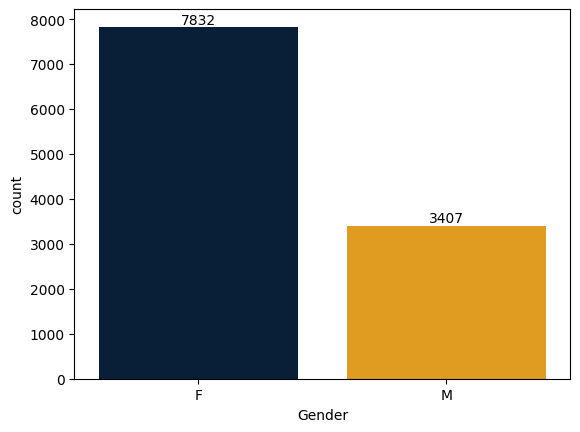

In [17]:
chart = sns.countplot(x='Gender', data=df, palette={'M': 'orange', 'F': '#001F3F'})

# Add bar labels
for bar in chart.containers:
    chart.bar_label(bar)

In [18]:
salegen=df.groupby(['Gender'])['Amount'].sum()
salegen

Gender
F    74335853
M    31913276
Name: Amount, dtype: int64

## 9.`Total Sales by Gender`

`Groups the data by 'Gender', sums the 'Amount', and sorts the results in descending order.`

C:\Users\Sheri Khan\AppData\Local\Temp\ipykernel_27188\1092133123.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Amount', data=salegen, palette={'M': 'orange', 'F': '#001F3F'})


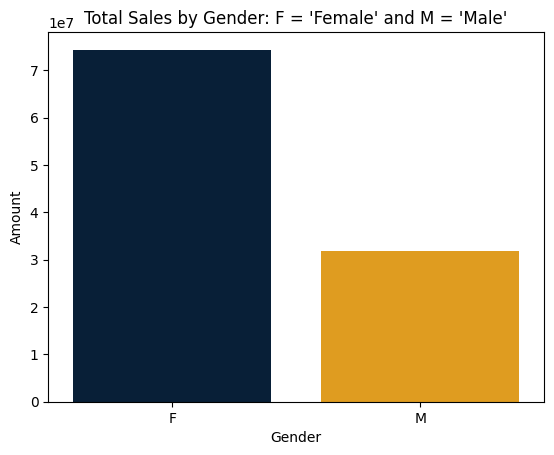

In [20]:
salegen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

# Creating the bar plot
sns.barplot(x='Gender', y='Amount', data=salegen, palette={'M': 'orange', 'F': '#001F3F'})

# Adding a title
plt.title("Total Sales by Gender: F = 'Female' and M = 'Male'")

# Show the plot
plt.show()

## 10. Age Group Analysis

`Creates a count plot for age groups, segmented by gender.`<br>
`Adds labels to the bars in the age group count plot.`

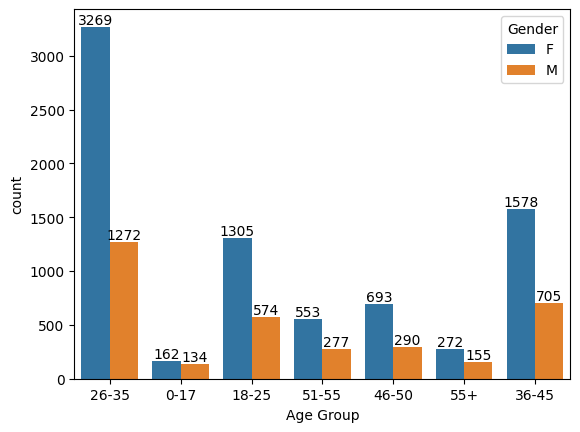

In [22]:
count_plot=sns.countplot(data=df,x='Age Group',hue='Gender')


for bars in count_plot.containers:
    count_plot.bar_label(bars)

## 11. Sales by Age Group

`Groups the data by 'Age Group', sums the sales, and sorts in descending order.`<br>
`Creates a bar plot to show total sales by age group.`

C:\Users\Sheri Khan\AppData\Local\Temp\ipykernel_27188\225758879.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group_sale,x='Age Group',y='Amount',palette='muted')


<Axes: xlabel='Age Group', ylabel='Amount'>

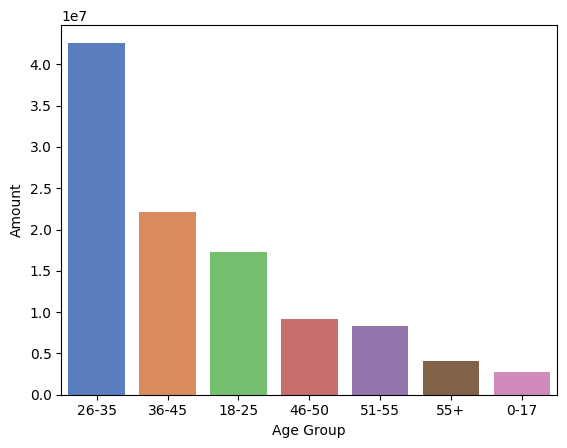

In [30]:
group_sale=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)


sns.barplot(data=group_sale,x='Age Group',y='Amount',palette='muted')

## 12. Top  States by Orders

`Groups the data by 'State', sums the orders, sorts them, and selects the top 10 states.`<br>
`Creates a bar plot for the top 10 states based on the number of orders.`

In [34]:
sale_state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

In [35]:
sale_state

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


C:\Users\Sheri Khan\AppData\Local\Temp\ipykernel_27188\1626468813.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sale_state,x='State',y='Orders',palette='deep')


<Axes: xlabel='State', ylabel='Orders'>

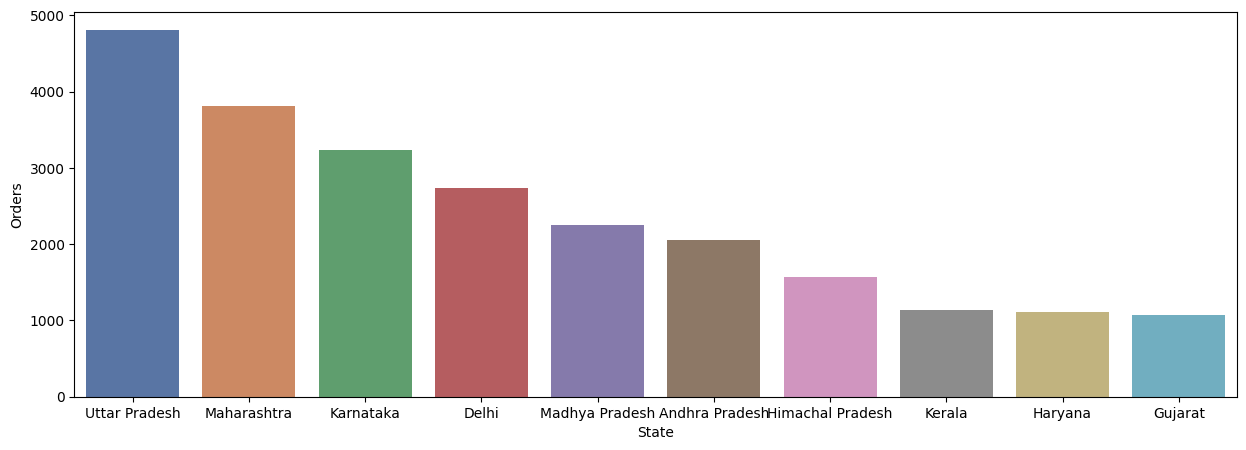

In [40]:
plt.figure(figsize=(15,5))
sns.barplot(data=sale_state,x='State',y='Orders',palette='deep')

## 13. Sales Amount by State
- Similar to the previous step, but focuses on the total sales amount.<br>
- Creates a bar plot for the top 10 states based on sales amount.

In [41]:
sale_state_amount=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

In [42]:
sale_state

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


C:\Users\Sheri Khan\AppData\Local\Temp\ipykernel_27188\2679394158.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sale_state_amount,x='State',y='Amount',palette='viridis')


<Axes: xlabel='State', ylabel='Amount'>

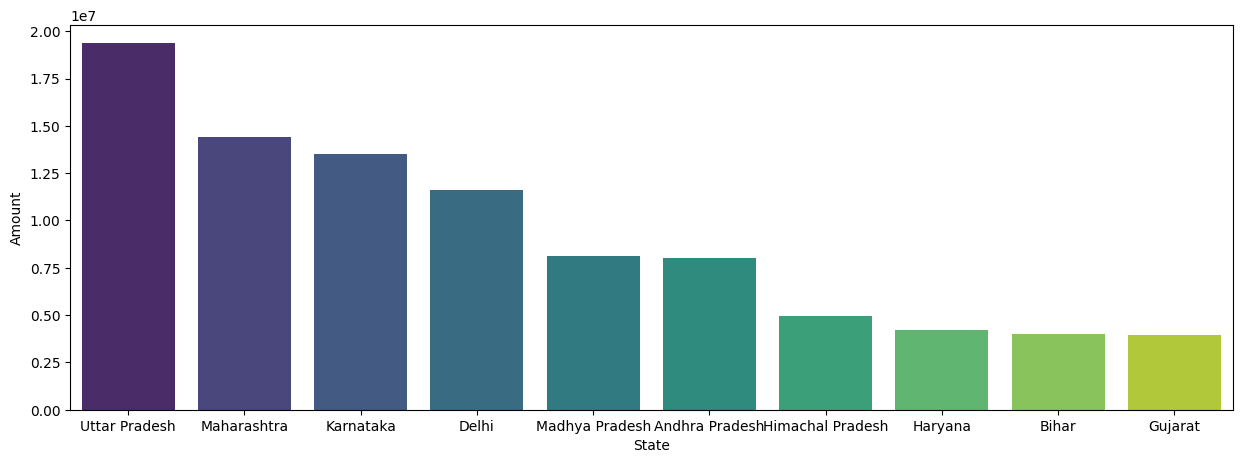

In [46]:
plt.figure(figsize=(15,5))
sns.barplot(data=sale_state_amount,x='State',y='Amount',palette='viridis')

## 14. Marital Status Distribution
`Creates a count plot for marital status and adds labels.`

C:\Users\Sheri Khan\AppData\Local\Temp\ipykernel_27188\1413275635.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  marital=sns.countplot(data=df ,x='Marital_Status',palette='deep')


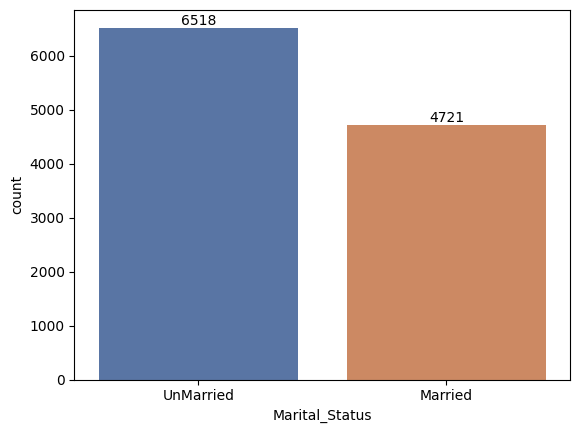

In [48]:
marital=sns.countplot(data=df ,x='Marital_Status',palette='deep')

for bar in marital.containers:
    marital.bar_label(bar)

## 15. Sales by Gender and Marital Status
- Groups by both gender and marital status, sums the sales, and creates a bar plot to visualize the results.

In [49]:
sale_gender_base=df.groupby(['Gender','Marital_Status'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

In [50]:
sale_gender_base

,Gender,Marital_Status,Amount
1,F,UnMarried,43786646
0,F,Married,30549207
3,M,UnMarried,18338738
2,M,Married,13574538


<Axes: xlabel='Marital_Status', ylabel='Amount'>

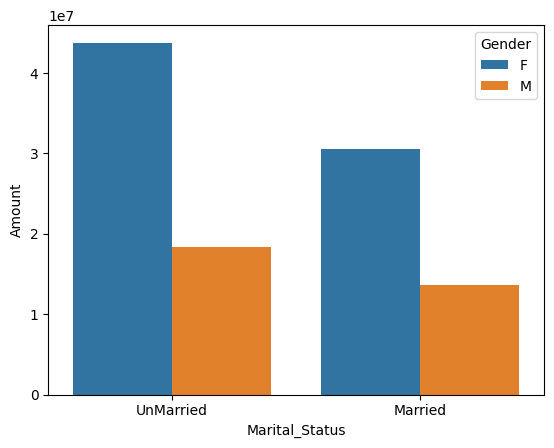

In [55]:
sns.barplot(data=sale_gender_base,x="Marital_Status",y="Amount",hue='Gender')


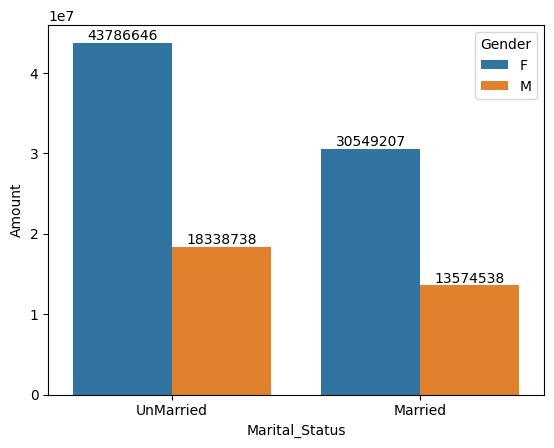

In [57]:
ax = sns.barplot(data=sale_gender_base, x="Marital_Status", y="Amount", hue='Gender')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

## 16. Occupation Analysis
`Creates a count plot for occupation with labels.`

C:\Users\Sheri Khan\AppData\Local\Temp\ipykernel_27188\3278994305.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  occuption_plot = sns.countplot(data = df, x = 'Occupation',palette='muted')


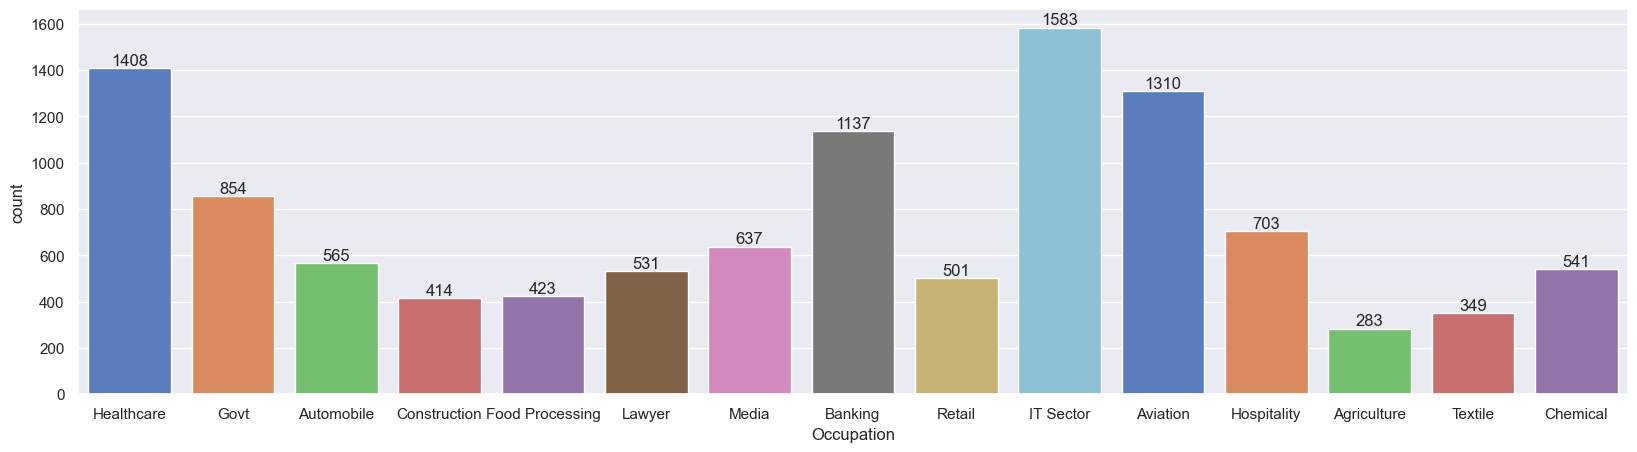

In [64]:
# sns.set(rc={'figure.figsize':(20,5)})
occuption_plot = sns.countplot(data = df, x = 'Occupation',palette='muted')

for bars in occuption_plot.containers:
    occuption_plot.bar_label(bars)

## 17. Sales by Occupation
`Groups by occupation, sums the sales, and creates a bar plot.`

C:\Users\Sheri Khan\AppData\Local\Temp\ipykernel_27188\1666995524.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount',palette='dark')


<Axes: xlabel='Occupation', ylabel='Amount'>

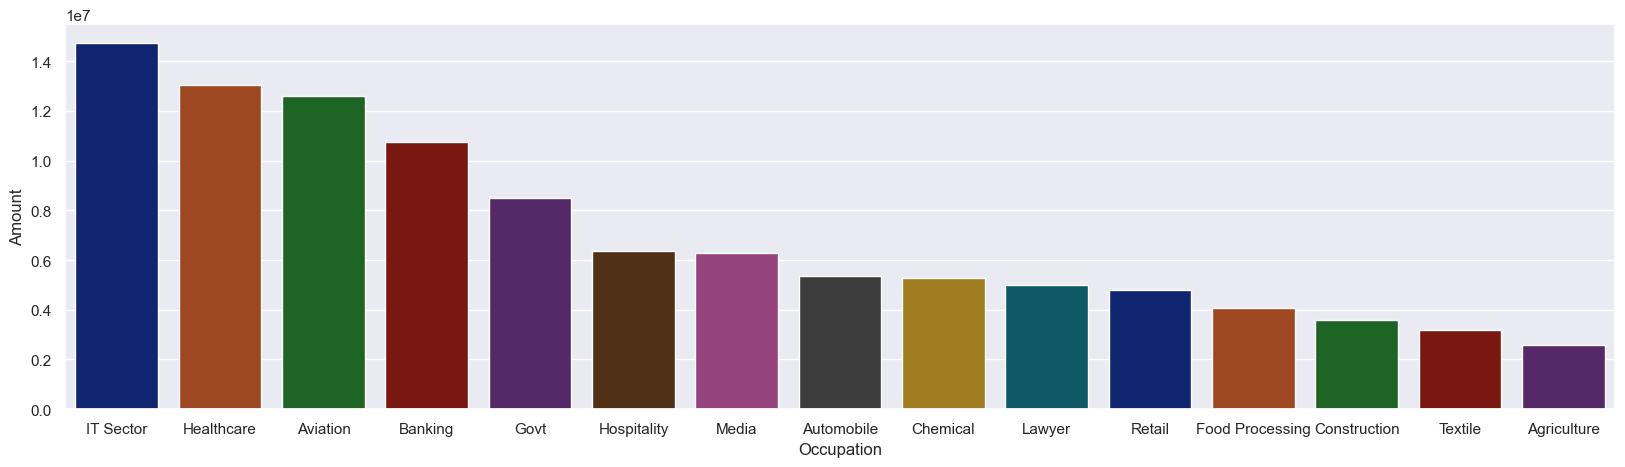

In [66]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount',palette='dark')

## 18. Product Category Analysis
`Creates a count plot for product categories with labels.`

C:\Users\Sheri Khan\AppData\Local\Temp\ipykernel_27188\744655833.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  product=sns.countplot(data=df,x="Product_Category",palette='dark')


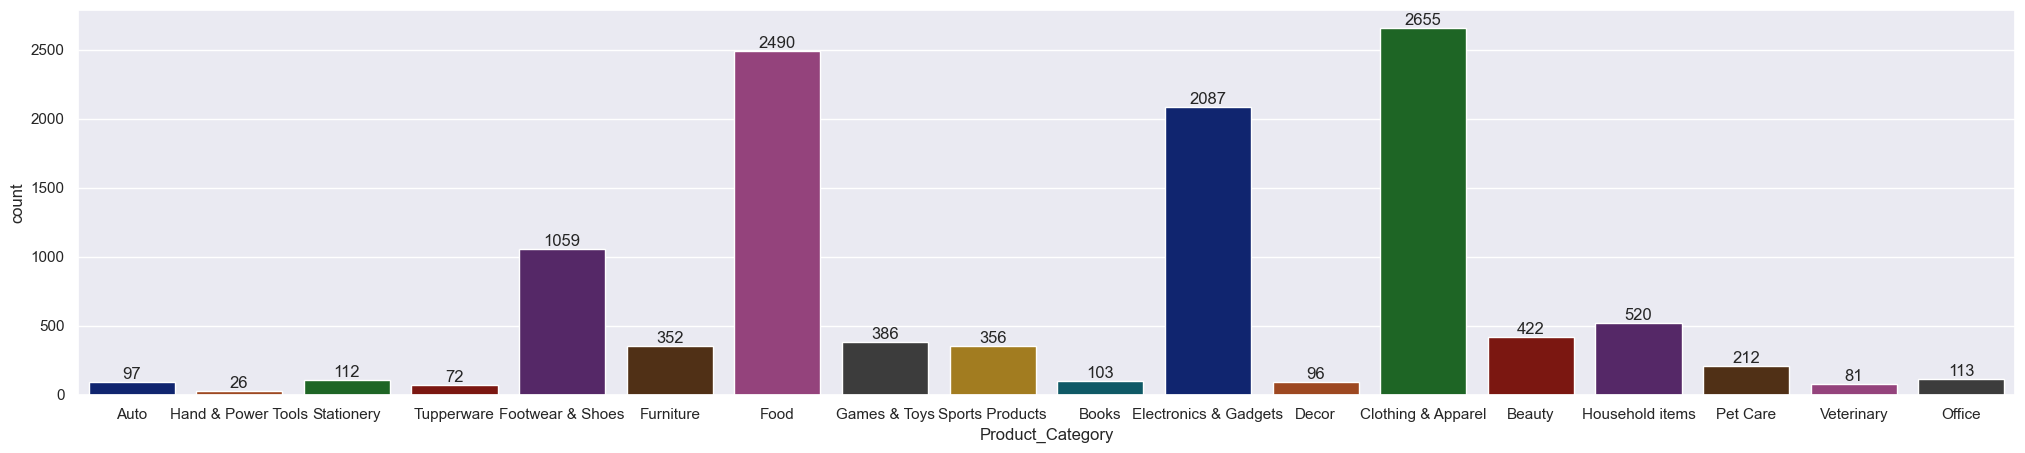

In [74]:
sns.set(rc={'figure.figsize':(25,5)})

product=sns.countplot(data=df,x="Product_Category",palette='dark')

for bars in product.containers:
    product.bar_label(bars)

## 19. Sales by Product Category
`Similar to previous steps, this shows the top product categories by sales amount.`

C:\Users\Sheri Khan\AppData\Local\Temp\ipykernel_27188\907676482.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount',palette='dark')


<Axes: xlabel='Product_Category', ylabel='Amount'>

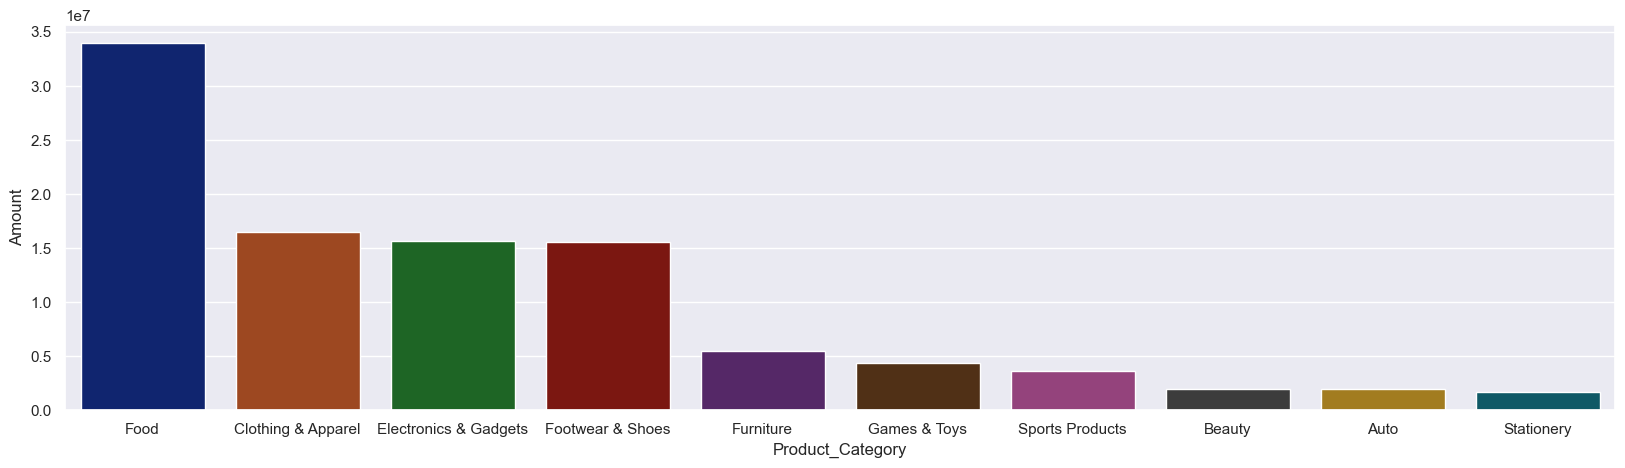

In [77]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount',palette='dark')

C:\Users\Sheri Khan\AppData\Local\Temp\ipykernel_27188\2753330290.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders',palette='viridis')


<Axes: xlabel='Product_ID', ylabel='Orders'>

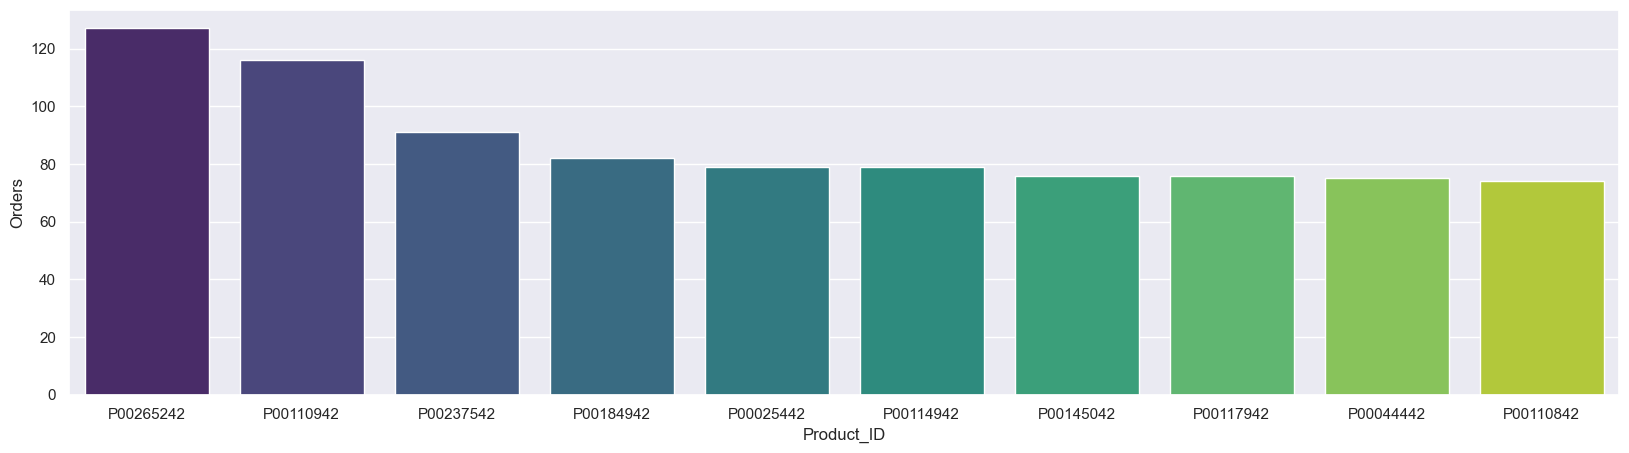

In [79]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders',palette='viridis')

## 20. Top Selling Products
`Analyzes the top 10 products based on the number of orders.`

`. Custom Color Bar for Products`<br>
`Uses a custom color palette for the top 10 most sold products.`

<Axes: xlabel='Product_ID'>

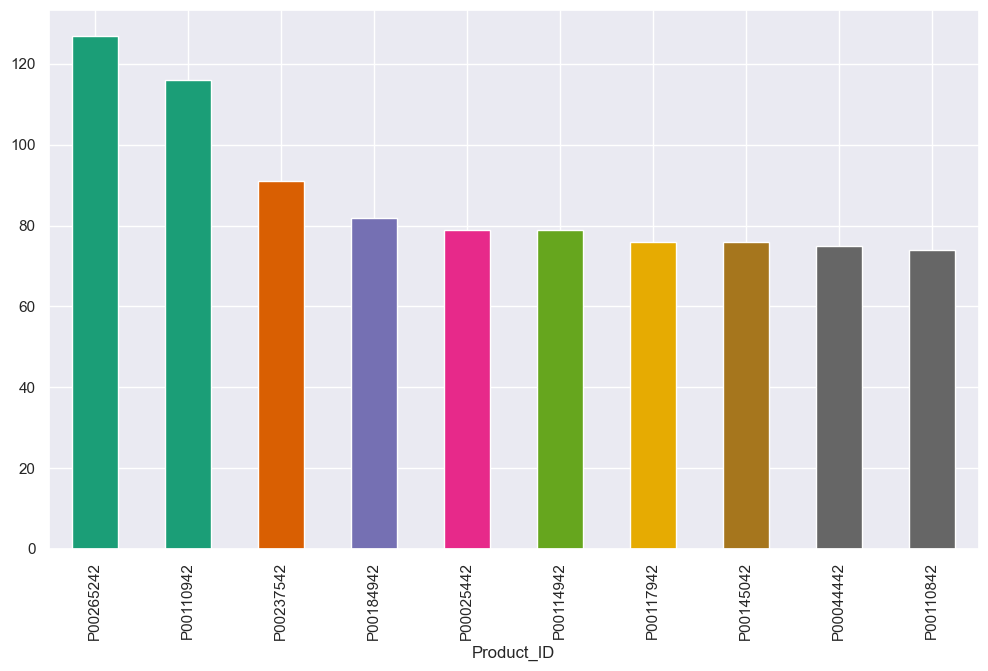

In [83]:
# top 10 most sold products (same thing as above)
import matplotlib.cm as cm
import numpy as np

colors = cm.Dark2(np.linspace(0, 1, 10))  # For 10 bars

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar',color=colors)

 ## The final insights indicate that **married women aged `26-35` from UP, Maharashtra, and Karnataka in sectors like `IT`, `Healthcare`, and `Aviation` tend to purchase products in categories such as Food, Clothing, and Electronics**.